In [13]:
!where python


c:\Users\bbuser\anaconda3\python.exe
C:\Python313\python.exe
C:\Users\bbuser\AppData\Local\Microsoft\WindowsApps\python.exe


In [16]:
import sys
!{sys.executable} -m pip install xgboost


  Using cached xgboost-3.0.5-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.5-py3-none-win_amd64.whl (56.8 MB)


In [39]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [40]:

X, y = fetch_openml('mnist_784', return_X_y=True,)
print(X.shape, y.shape)

y = y.astype(int)
X = X.astype("float32") / 255.0

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

(70000, 784) (70000,)
Train: (49000, 784) (49000,)
Test: (21000, 784) (21000,)


In [41]:

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (49000, 784) (49000,)
Test shape: (21000, 784) (21000,)


In [42]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial'),
    "SVM": SVC(kernel='rbf', gamma='scale'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}


In [43]:
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

print("\nFinal Results:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


Training Logistic Regression...


c:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.9205
Training SVM...
SVM Accuracy: 0.9763
Training Decision Tree...
Decision Tree Accuracy: 0.8683
Training Random Forest...
Random Forest Accuracy: 0.9668
Training XGBoost...


c:\Users\bbuser\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:07:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9762

Final Results:
Logistic Regression: 0.9205
SVM: 0.9763
Decision Tree: 0.8683
Random Forest: 0.9668
XGBoost: 0.9762


In [44]:
results = {}

for name, model in models.items(): 
    print("="*50)
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

print("\n=== Accuracy Comparison ===")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


Training Logistic Regression...


c:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Accuracy: 0.9205
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2058
           1       0.95      0.97      0.96      2364
           2       0.91      0.90      0.91      2133
           3       0.90      0.89      0.90      2176
           4       0.92      0.93      0.93      1936
           5       0.89      0.88      0.89      1915
           6       0.94      0.95      0.95      2088
           7       0.93      0.94      0.94      2248
           8       0.89      0.86      0.88      1992
           9       0.90      0.90      0.90      2090

    accuracy                           0.92     21000
   macro avg       0.92      0.92      0.92     21000
weighted avg       0.92      0.92      0.92     21000

Training SVM...

SVM Accuracy: 0.9763
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2058
           1       0.98      0.99      0.99      2364
  

c:\Users\bbuser\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:14:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.9762
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2058
           1       0.98      0.99      0.99      2364
           2       0.97      0.98      0.97      2133
           3       0.98      0.96      0.97      2176
           4       0.97      0.98      0.98      1936
           5       0.98      0.97      0.98      1915
           6       0.98      0.99      0.98      2088
           7       0.97      0.98      0.97      2248
           8       0.97      0.97      0.97      1992
           9       0.96      0.97      0.96      2090

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000


=== Accuracy Comparison ===
Logistic Regression: 0.9205
SVM: 0.9763
Decision Tree: 0.8683
Random Forest: 0.9668
XGBoost: 0.9762


In [45]:
img = X_test.iloc[idx].values.reshape(28, 28) 

Error Analysis for Logistic Regression
Total misclassified: 1669


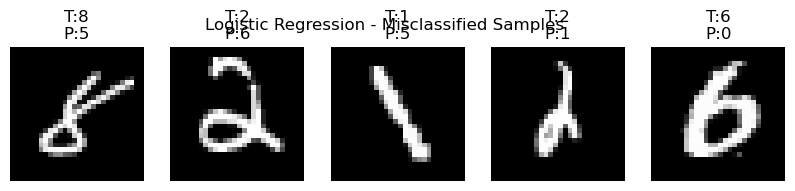

Error Analysis for SVM
Total misclassified: 498


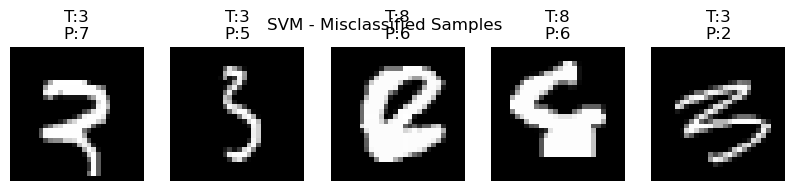

Error Analysis for Decision Tree
Total misclassified: 2765


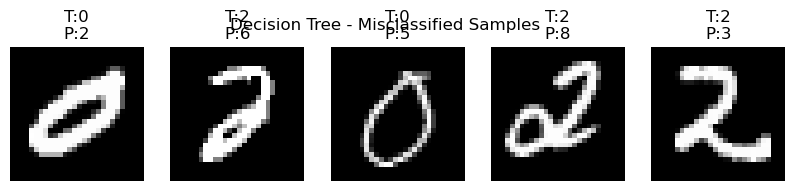

Error Analysis for Random Forest
Total misclassified: 697


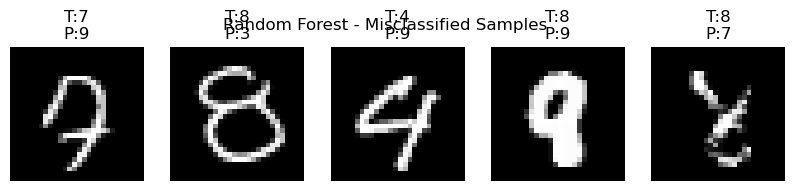

Error Analysis for XGBoost
Total misclassified: 499


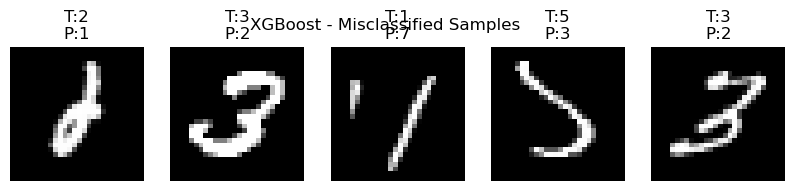

In [46]:
for name, model in models.items():
    print("="*50)
    print(f"Error Analysis for {name}")
    
    y_pred = model.predict(X_test)
    misclassified = np.where(y_test != y_pred)[0]
    print(f"Total misclassified: {len(misclassified)}")
    
    if len(misclassified) > 0:
        idxs = np.random.choice(misclassified, size=5, replace=False)
        
        plt.figure(figsize=(10, 2))
        for i, idx in enumerate(idxs):
            img = X_test.iloc[idx].values.reshape(28, 28)  # ✅ fixed here
            plt.subplot(1, 5, i+1)
            plt.imshow(img, cmap="gray")
            plt.title(f"T:{y_test.iloc[idx]}\nP:{y_pred[idx]}")
            plt.axis("off")
        plt.suptitle(f"{name} - Misclassified Samples")
        plt.show()


Training Logistic Regression...


c:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Accuracy: 0.9205
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2058
           1       0.95      0.97      0.96      2364
           2       0.91      0.90      0.91      2133
           3       0.90      0.89      0.90      2176
           4       0.92      0.93      0.93      1936
           5       0.89      0.88      0.89      1915
           6       0.94      0.95      0.95      2088
           7       0.93      0.94      0.94      2248
           8       0.89      0.86      0.88      1992
           9       0.90      0.90      0.90      2090

    accuracy                           0.92     21000
   macro avg       0.92      0.92      0.92     21000
weighted avg       0.92      0.92      0.92     21000



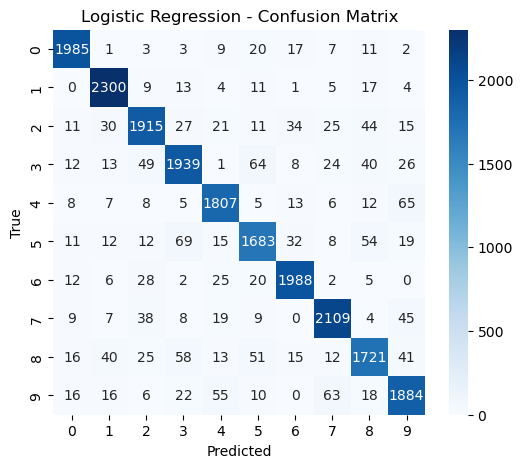

Training SVM...

SVM Accuracy: 0.9763
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2058
           1       0.98      0.99      0.99      2364
           2       0.97      0.98      0.97      2133
           3       0.97      0.97      0.97      2176
           4       0.97      0.98      0.97      1936
           5       0.98      0.97      0.97      1915
           6       0.98      0.99      0.99      2088
           7       0.97      0.97      0.97      2248
           8       0.98      0.96      0.97      1992
           9       0.97      0.96      0.97      2090

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000



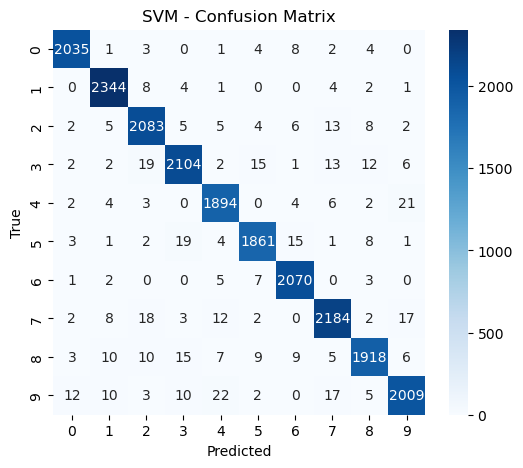

Training Decision Tree...

Decision Tree Accuracy: 0.8683
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2058
           1       0.94      0.96      0.95      2364
           2       0.86      0.84      0.85      2133
           3       0.83      0.84      0.84      2176
           4       0.85      0.87      0.86      1936
           5       0.82      0.81      0.82      1915
           6       0.90      0.90      0.90      2088
           7       0.91      0.90      0.91      2248
           8       0.82      0.78      0.80      1992
           9       0.83      0.84      0.83      2090

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.87      0.87      0.87     21000



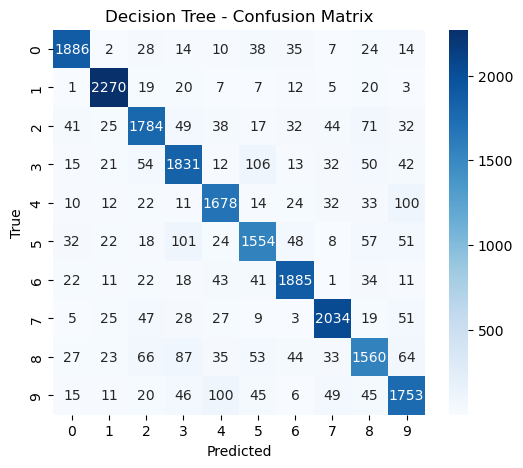

Training Random Forest...

Random Forest Accuracy: 0.9668
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2058
           1       0.98      0.99      0.98      2364
           2       0.96      0.97      0.96      2133
           3       0.96      0.95      0.95      2176
           4       0.97      0.97      0.97      1936
           5       0.97      0.96      0.97      1915
           6       0.98      0.99      0.98      2088
           7       0.96      0.96      0.96      2248
           8       0.96      0.95      0.95      1992
           9       0.95      0.95      0.95      2090

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



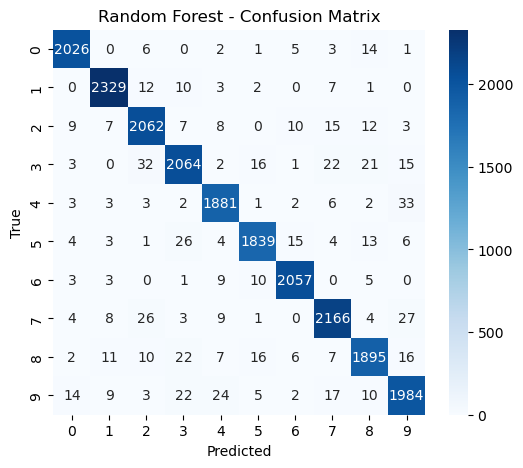

Training XGBoost...


c:\Users\bbuser\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:32:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.9762
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2058
           1       0.98      0.99      0.99      2364
           2       0.97      0.98      0.97      2133
           3       0.98      0.96      0.97      2176
           4       0.97      0.98      0.98      1936
           5       0.98      0.97      0.98      1915
           6       0.98      0.99      0.98      2088
           7       0.97      0.98      0.97      2248
           8       0.97      0.97      0.97      1992
           9       0.96      0.97      0.96      2090

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000



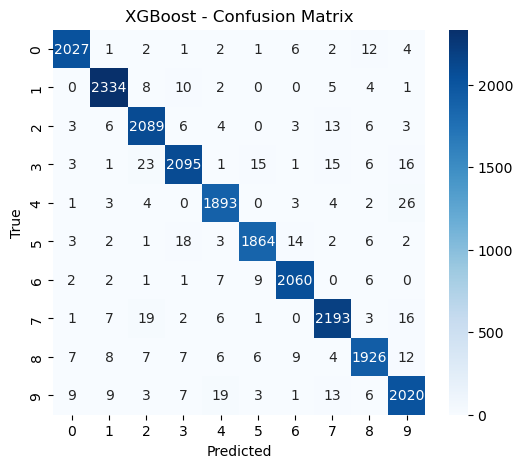


=== Summary of Model Performance ===
                 Model  Accuracy  Precision    Recall  F1-score  \
0  Logistic Regression  0.920524   0.919571  0.919422  0.919421   
1                  SVM  0.976286   0.976234  0.976095  0.976144   
2        Decision Tree  0.868333   0.866317  0.866219  0.866185   
3        Random Forest  0.966810   0.966698  0.966606  0.966640   
4              XGBoost  0.976238   0.976225  0.976105  0.976153   

   Train Time (s)  
0       14.138041  
1      137.440671  
2       10.820804  
3       24.441138  
4      149.408300  


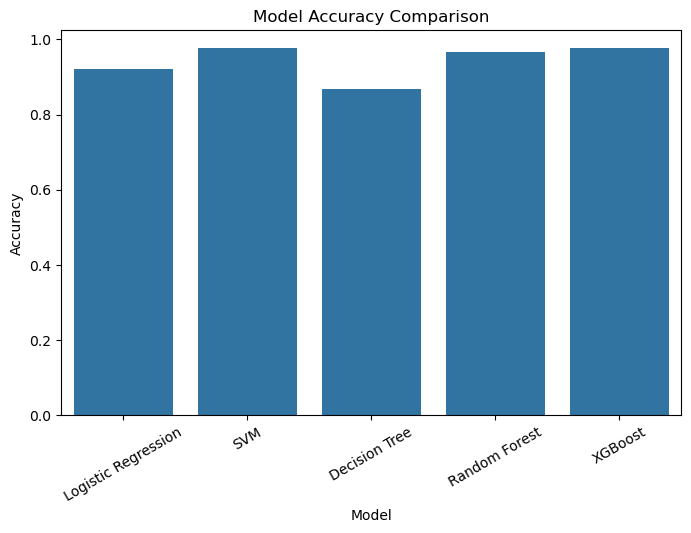

In [48]:
metrics = []

for name, model in models.items():
    print("="*60)
    print(f"Training {name}...")
    
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    
    y_pred = model.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    metrics.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": np.mean([report[str(i)]["precision"] for i in range(10)]),
        "Recall": np.mean([report[str(i)]["recall"] for i in range(10)]),
        "F1-score": np.mean([report[str(i)]["f1-score"] for i in range(10)]),
        "Train Time (s)": end - start
    })
    
    # Print report
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Summary DataFrame
df_metrics = pd.DataFrame(metrics)
print("\n=== Summary of Model Performance ===")
print(df_metrics)

# Bar chart of Accuracy
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=df_metrics)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.show()